<a href="https://colab.research.google.com/github/raflinoob132/MachineLearning-1/blob/main/UTS/Classification/UTS_Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Semua import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.feature_selection import VarianceThreshold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

# 1. Data Collection

# Download dataset
import gdown
file_id = "1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output="KlasifikasiUTSTelkom.csv", quiet=False)

# Load dataset
df = pd.read_csv("KlasifikasiUTSTelkom.csv")

# Cek data
print("Contoh data:")
print(df.head())


Downloading...
From (original): https://drive.google.com/uc?id=1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU
From (redirected): https://drive.google.com/uc?id=1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU&confirm=t&uuid=995fd846-07d9-4e45-be74-18c8767d1704
To: /content/KlasifikasiUTSTelkom.csv
100%|██████████| 151M/151M [00:00<00:00, 198MB/s]


Contoh data:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

In [ ]:

# 1a. Data Cleaning
print("\nMissing values:")
print(df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# 1b. Feature Selection - Remove constant features
selector = VarianceThreshold(threshold=0.01)
features = df.drop(columns=['Class'])  # Hapus Class sebelum cek Variance
selector.fit(features)

selected_features = features.columns[selector.get_support()]
df = df[selected_features.union(['Class'])]

print("\nFitur setelah Variance Threshold:")
print(selected_features)



Missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Fitur setelah Variance Threshold:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [ ]:

# 1c. Feature Engineering
X = df.drop(columns=['Class'])
y = df['Class']

# Scaling all features (karena Time dan Amount skalanya beda jauh)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)



Training Logistic Regression...


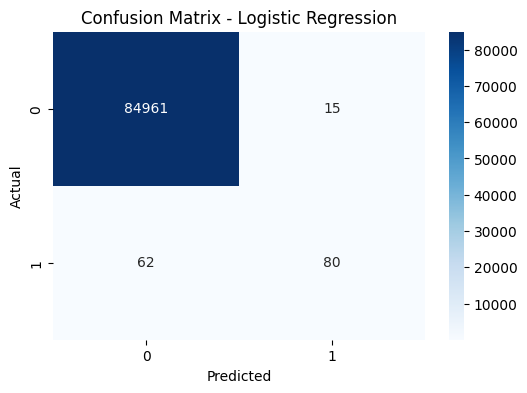

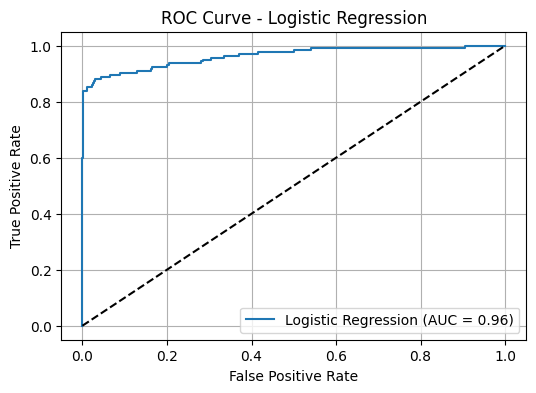


Training Decision Tree...


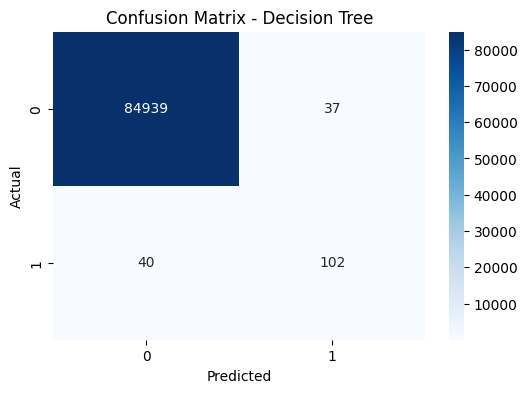

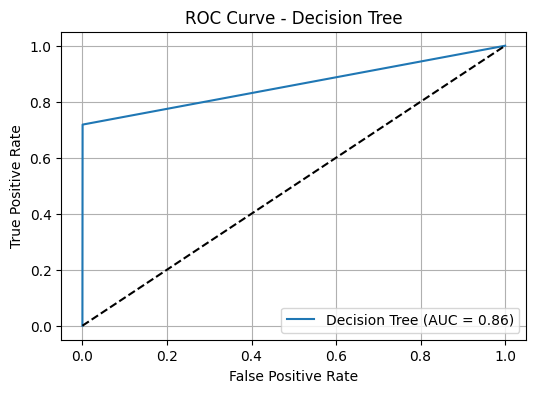


Training KNN...


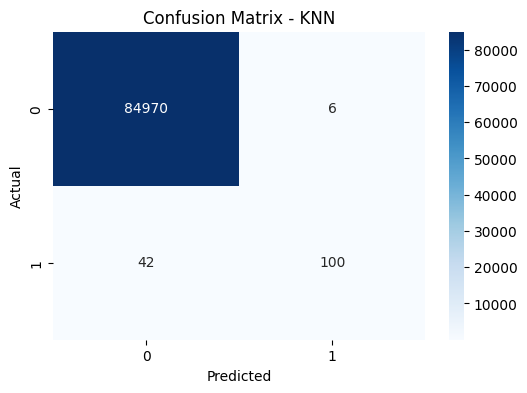

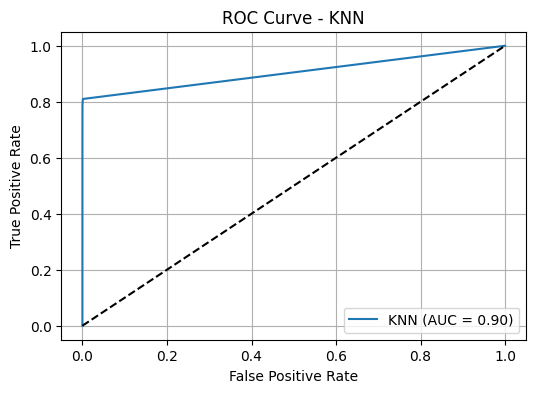


Training Bagging...


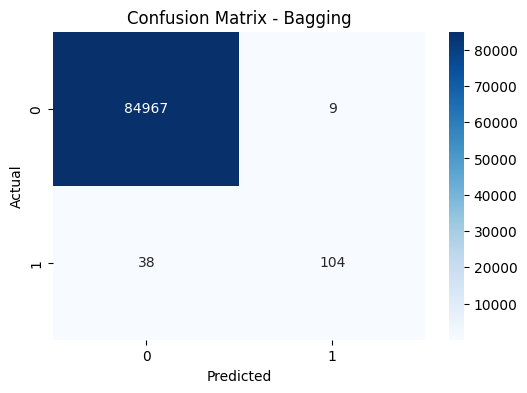

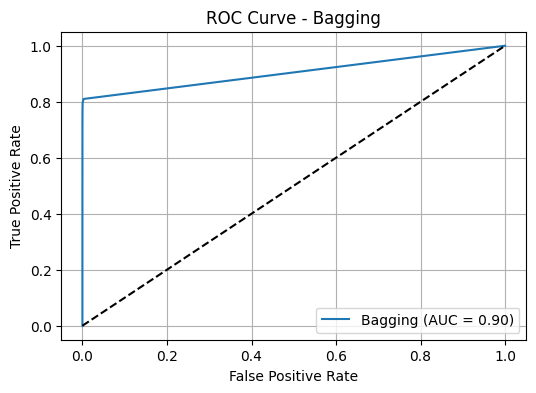


Training Boosting...


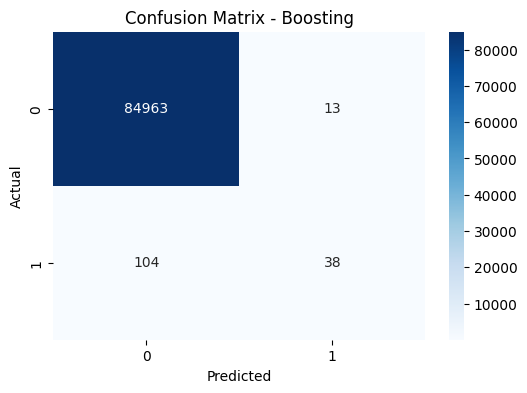

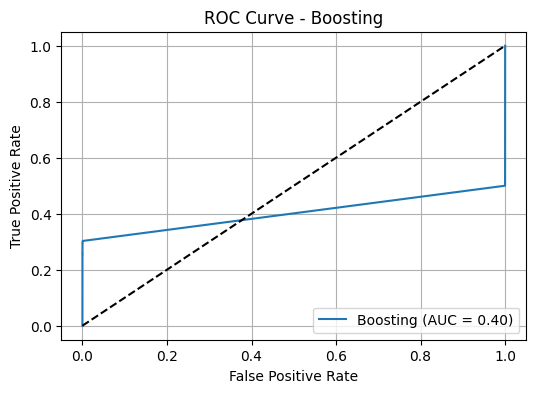


Training SVM...


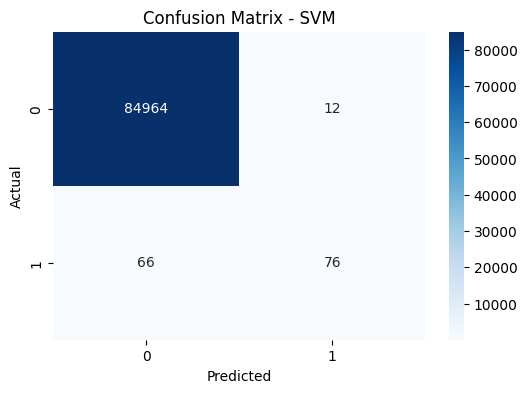

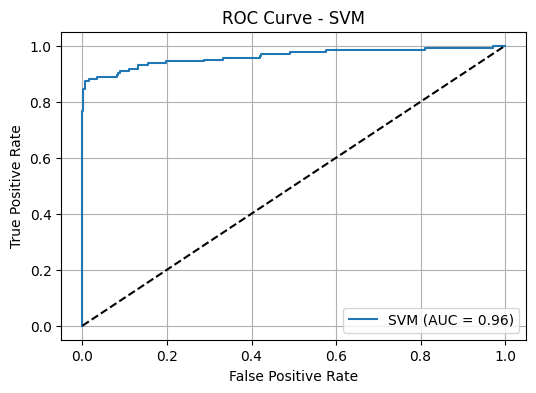

In [ ]:

from sklearn.svm import LinearSVC

# 1d. Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Bagging': BaggingClassifier(),
    'Boosting': GradientBoostingClassifier(),
    'SVM': LinearSVC()
}

results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC AUC': auc
    })

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



In [ ]:

# 2. Evaluation Summary
results_df = pd.DataFrame(results)
print("\nSummary Metrics:")
print(results_df.sort_values(by='F1-Score', ascending=False))


Summary Metrics:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
3              Bagging  0.999448   0.920354  0.732394  0.815686  0.904636
2                  KNN  0.999436   0.943396  0.704225  0.806452  0.904796
1        Decision Tree  0.999095   0.733813  0.718310  0.725979  0.858937
0  Logistic Regression  0.999095   0.842105  0.563380  0.675105  0.963738
5                  SVM  0.999084   0.863636  0.535211  0.660870  0.962034
4             Boosting  0.998625   0.745098  0.267606  0.393782  0.401336
